# Análisis de datos exploratorio

In [9]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


## Análisis de los datos de venta

In [19]:
datos_venta = pd.read_csv(os.path.join("datos", "data_sales.csv"), sep=";")
datos_venta["date"] = pd.to_datetime(datos_venta.date, format='%Y-%m-%d')
datos_venta.head()

,item_id,date,quantity,unit_sale_price (CLP),total (CLP),client_id
0,1853,2023-12-28,1,62990.0,62990.0,3604.0
1,1003,2021-04-04,1,55990.0,55990.0,507.0
2,471,2022-01-18,1,9220.0,9220.0,4547.0
3,374,2023-04-19,1,2330.0,2330.0,1508.0
4,1847,2023-05-18,1,8990.0,8990.0,2047.0


In [20]:
# Vamos a tener el tipo de cada columna, cuantos no nulos hay y memoria
datos_venta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181196 entries, 0 to 181195
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                181196 non-null  int64         
 1   date                   181196 non-null  datetime64[ns]
 2   quantity               181196 non-null  int64         
 3   unit_sale_price (CLP)  181196 non-null  float64       
 4   total (CLP)            181196 non-null  float64       
 5   client_id              171258 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 8.3 MB


In [21]:
# Descripción estadística de las columnas numéricas
datos_venta.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
item_id,181196.0,1518.022451,530.992416,0.0,1408.0,1797.0,1828.0,1869.0
quantity,181196.0,1.233637,0.600804,1.0,1.0,1.0,1.0,17.0
unit_sale_price (CLP),181196.0,26041.582554,20679.510417,39.0,7990.0,20890.0,38900.0,189990.0
total (CLP),181196.0,32428.802245,34771.858126,39.0,8990.0,24990.0,44990.0,968830.0
client_id,171258.0,2566.697474,1506.370894,1.0,1248.0,2569.0,3865.0,5196.0


In [28]:
# Vendrían siendo la cantidad de items que se vendieron en una fecha dada
datos_venta.date.value_counts()

2023-11-30    1001
2022-12-31     994
2022-07-31     993
2023-05-31     991
2024-02-29     989
              ... 
2020-01-10      43
2020-01-25      41
2020-01-18      39
2020-01-06      36
2020-01-30      34
Name: date, Length: 1446, dtype: int64

<Axes: xlabel='item_id', ylabel='cantidad_vendida'>

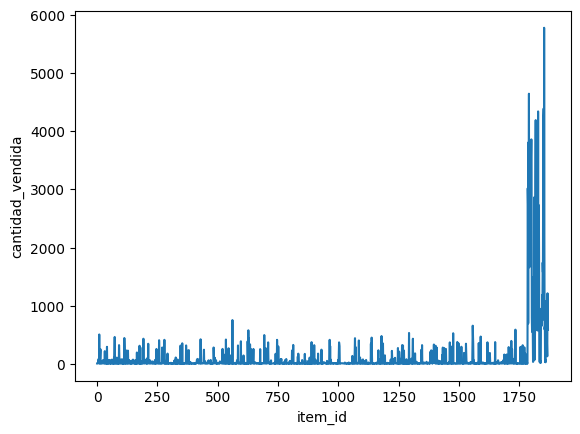

In [75]:
# La cantidad de veces que se ha vendido un ítem
ventas_item = datos_venta.item_id.value_counts()
ventas_item = ventas_item.reset_index()
ventas_item.columns = ["item_id", "cantidad_vendida"]
# print(ventas_item)

# sns.lineplot(data=ventas_item, x="item_id", y="cantidad_vendida")
sns.lineplot(data=ventas_item, x="item_id", y="cantidad_vendida")

In [53]:
# Las veces que ha comprado un determinado cliente
usuarios_compras = datos_venta.client_id.value_counts()
usuarios_compras = usuarios_compras.reset_index()
usuarios_compras.columns = ["client_id", "cantidad_compras"]

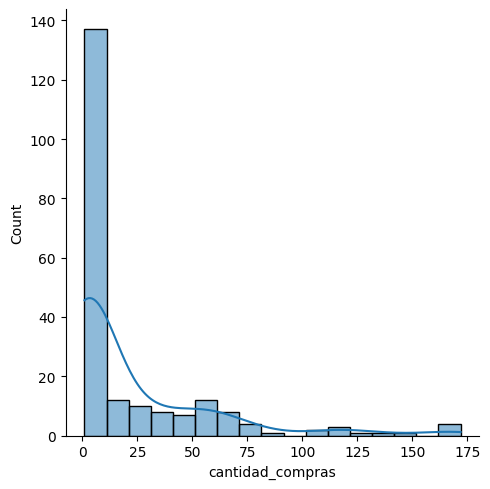

In [71]:
# sns.histplot(usuarios_compras["cantidad_compras"].value_counts())
sns.displot(usuarios_compras["cantidad_compras"].value_counts(), kde=True)

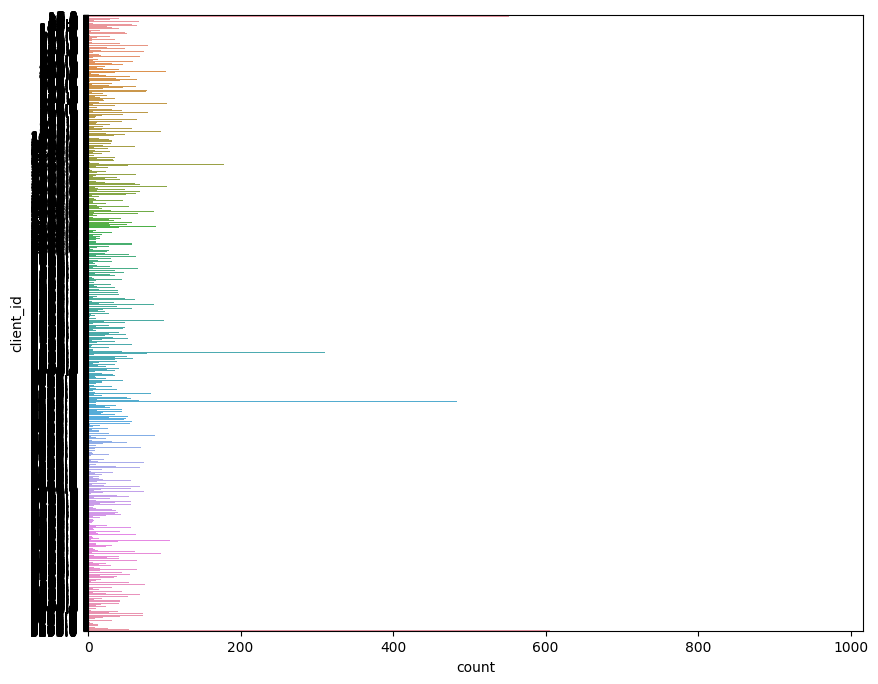

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))
top_n = datos_venta.client_id.value_counts().index[:6]
sns.countplot(y="client_id", data=(datos_venta.assign(cliente=datos_venta.client_id.where(datos_venta.client_id.isin(top_n), "Otro"))))
plt.show()

<Axes: xlabel='cantidad_compras'>

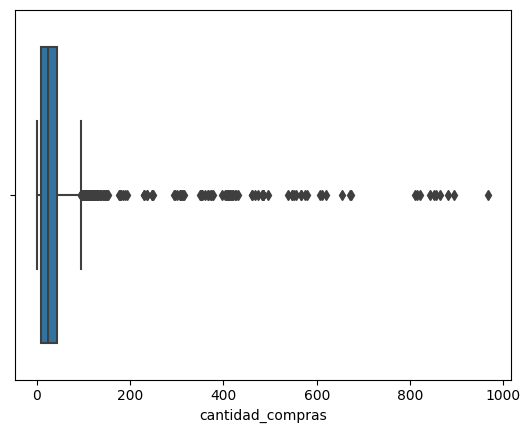

In [76]:
sns.boxplot(x=usuarios_compras["cantidad_compras"])

In [24]:
# Datos faltantes
missing_values = datos_venta.isnull().sum()
print(missing_values)

item_id                     0
date                        0
quantity                    0
unit_sale_price (CLP)       0
total (CLP)                 0
client_id                9938
dtype: int64


# Análisis datos inventario